In [1]:
import cv2
from pathlib import Path
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from day_month_data_pipeline import DayMonth_data_pipeline

In [2]:
day_month_data = DayMonth_data_pipeline(data_dir="dataset/day_month")
class_names = day_month_data.class_names

# **Load Model**

In [3]:
model_path = "trained_models/day_month_model/day_month_model.h5"
model = load_model(model_path)

# **Method**

In [4]:
def predict_burmese_num(model, class_names, path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(64,64))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    normalized_img = img_array / 255.0
    img_to_predict = np.expand_dims(normalized_img, axis=0)

    prediction = model.predict(img_to_predict)
    predicted_class = np.argmax(prediction)

    return class_names[predicted_class]

In [5]:
def display_predictions_on_test(paths, results):
    font_path = Path(r"C:\Windows\Fonts\Pyidaungsu-2.5.3_Regular.ttf")
    fig, ax = plt.subplots(7, 5, figsize=(15,19))
    ax = ax.flatten()
    for i in range(32):
        img = "test_data/" + paths[i]
        img = cv2.imread(img, cv2.IMREAD_COLOR_RGB)
        ax[i].imshow(img)
        ax[i].set_title(f"ခန့်မှန်းချက်: {results[i]}", fontproperties=font_path, fontsize=15, pad=15)
    for i in range(32, 35):
        ax[i].axis('off')

    plt.tight_layout()
    plt.show()

# **Prediction**

In [6]:
test_imgs = ["t_0.jpg", "t_1.jpg", "t_2.jpg", "t_5.jpg", "t_4.jpg", "t_13.jpg", "t_6.jpg", "t_7.jpg", "t_18.jpg", "t_9.jpg",
             "t_30.jpg", "t_21.jpg", "t_12.jpg", "t_14.jpg", "t_3.jpg", "t_15.jpg", "t_26.jpg", "t_17.jpg", "t_8.jpg", "t_19.jpg",
             "t_20.jpg", "t_11.jpg", "t_22.jpg", "t_27.jpg", "t_24.jpg", "t_25.jpg", "t_29.jpg", "t_23.jpg", "t_28.jpg", "t_16.jpg",
             "t_10.jpg", "t_31.jpg"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━

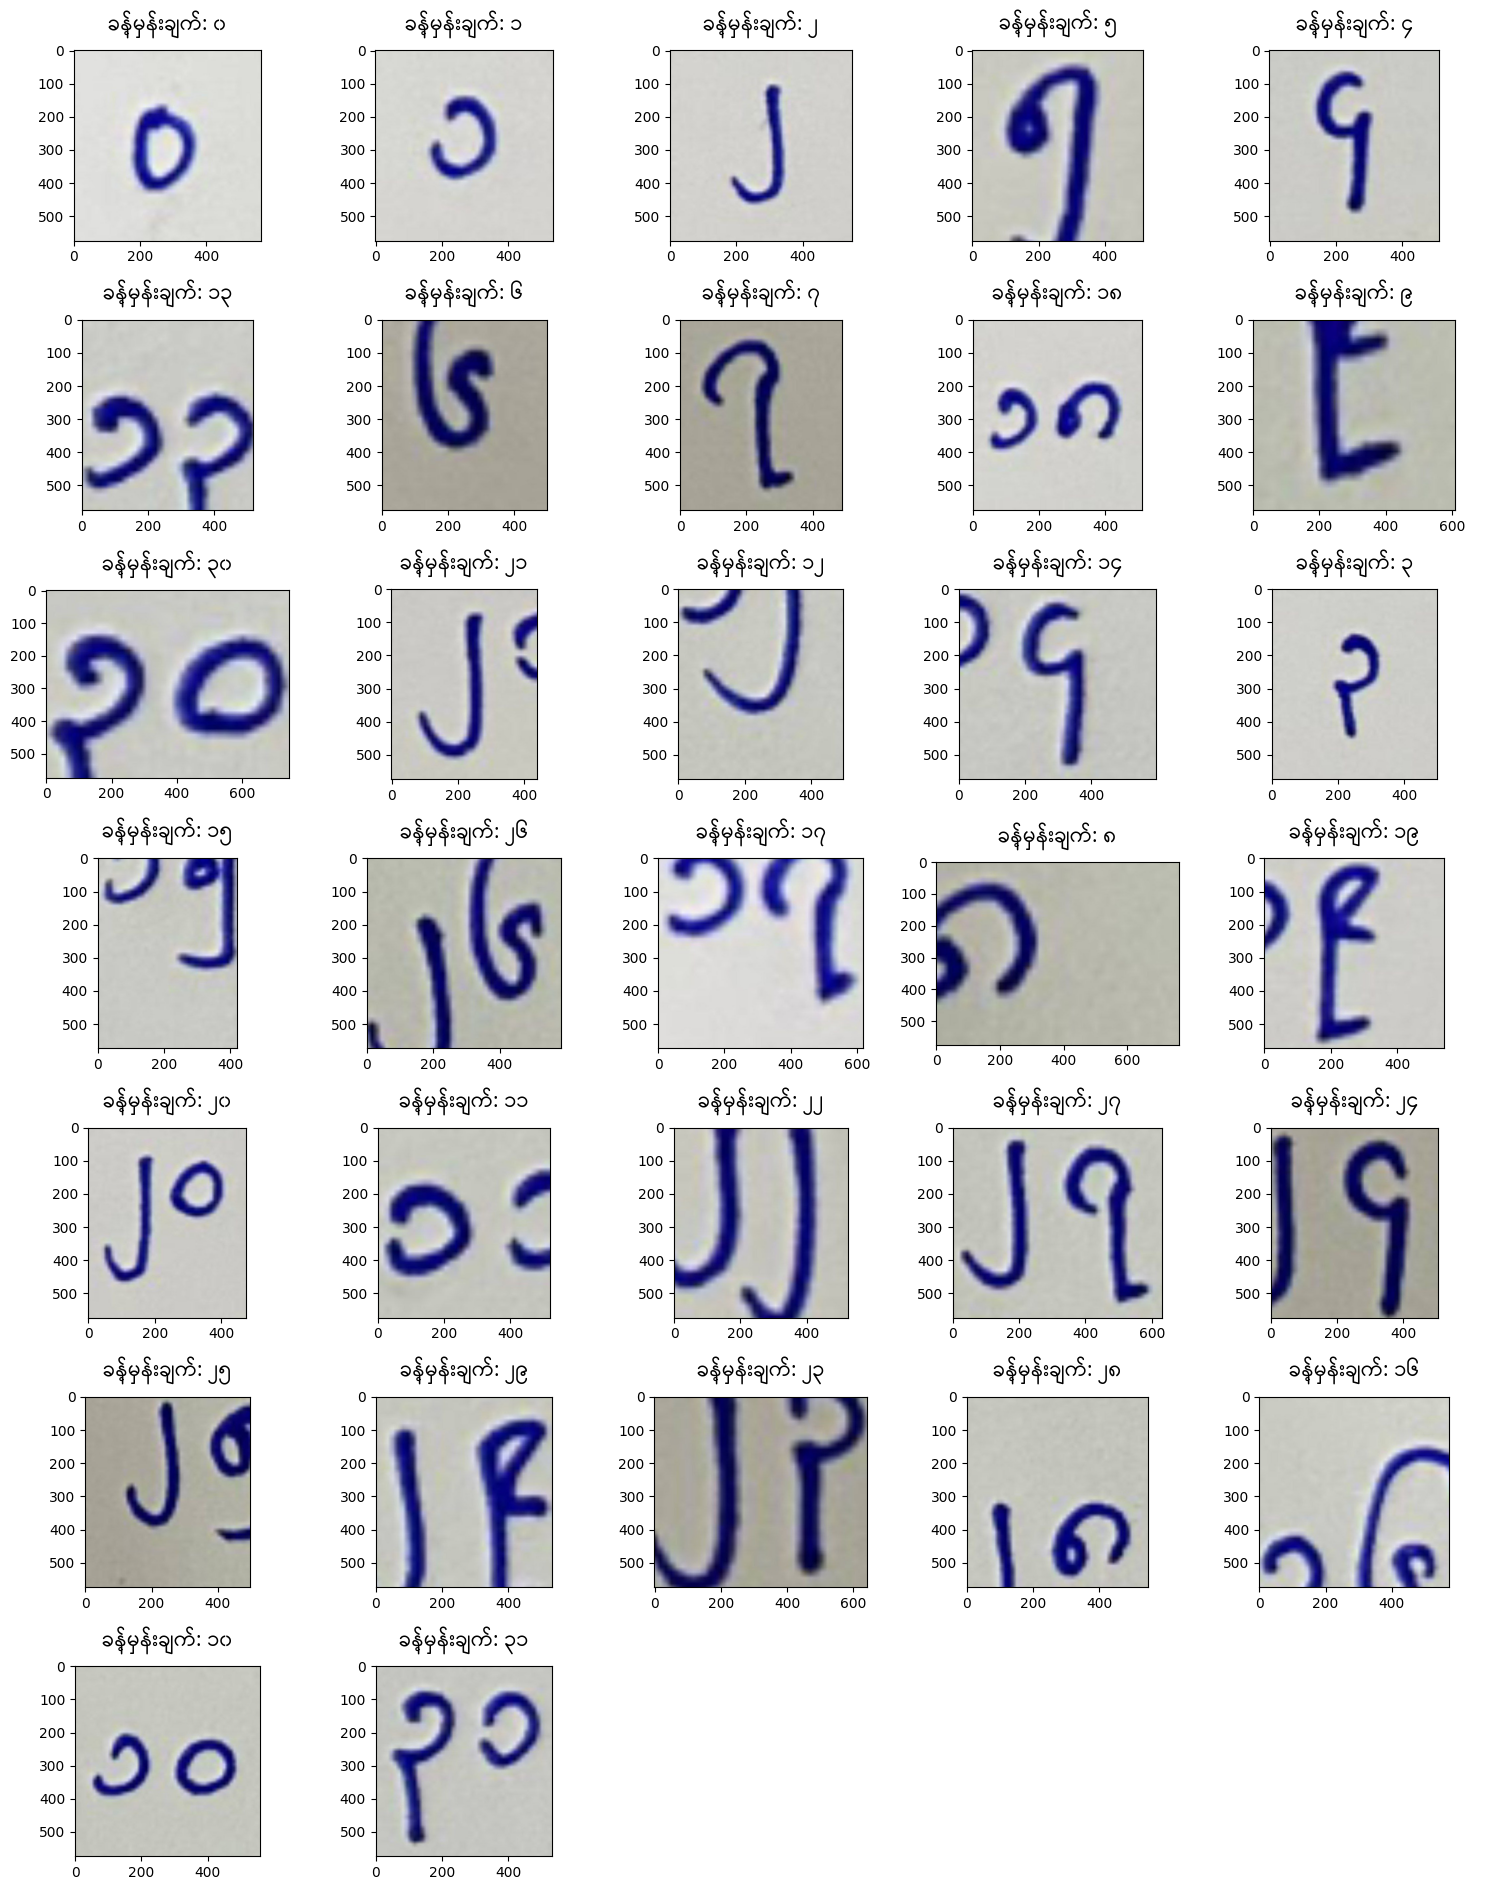

In [7]:
predictions = []
for i in range(32):
    img = "test_data/" + test_imgs[i]
    predictions.append(predict_burmese_num(model, class_names, img))
display_predictions_on_test(test_imgs, predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
ခန့်မှန်းချက်: ၈


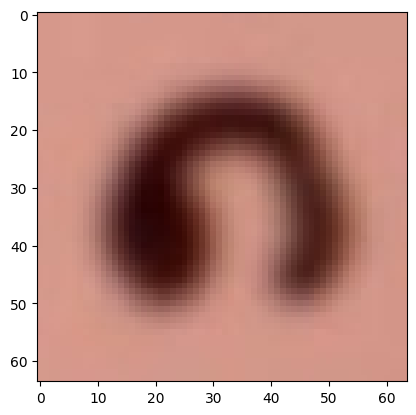

In [8]:
result_8b = predict_burmese_num(model, class_names, "236_8.jpg")
print(f"ခန့်မှန်းချက်: {result_8b}")
img_8b = cv2.imread("236_8.jpg", cv2.IMREAD_COLOR_RGB)
plt.imshow(img_8b)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
ခန့်မှန်းချက်: ၈


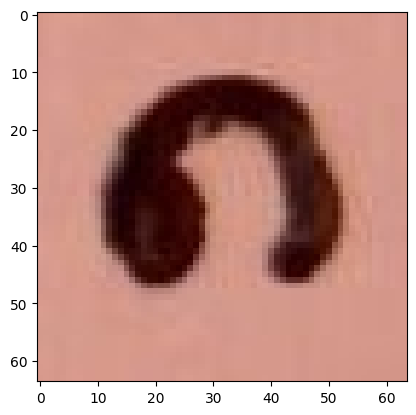

In [9]:
result_8 = predict_burmese_num(model, class_names, "233_8.jpg")
print(f"ခန့်မှန်းချက်: {result_8}")
img_8 = cv2.imread("233_8.jpg", cv2.IMREAD_COLOR_RGB)
plt.imshow(img_8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
ခန့်မှန်းချက်: ၁


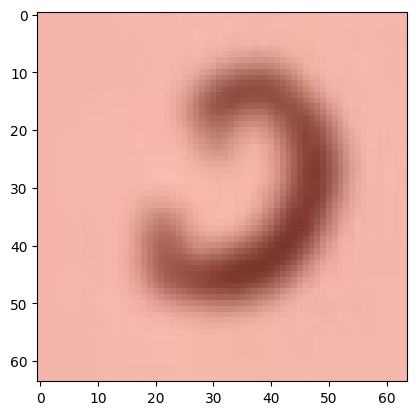

In [10]:
result_1 = predict_burmese_num(model, class_names, "325_1.jpg")
print(f"ခန့်မှန်းချက်: {result_1}")
img_1 = cv2.imread("325_1.jpg", cv2.IMREAD_COLOR_RGB)
plt.imshow(img_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
ခန့်မှန်းချက်: ၆


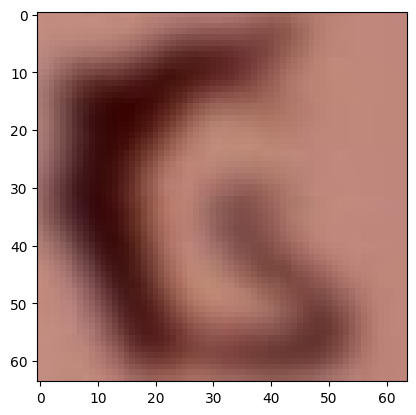

In [11]:
result_6 = predict_burmese_num(model, class_names, "273_6.jpg")
print(f"ခန့်မှန်းချက်: {result_6}")
img_6 = cv2.imread("273_6.jpg", cv2.IMREAD_COLOR_RGB)
plt.imshow(img_6)

# **On NRC**

In [6]:
def predict_burmese_num_nrc(model, class_names, image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, thresh_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    resized_img = cv2.resize(thresh_img, (64, 64))
    img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)
    img_array = tf.keras.preprocessing.image.img_to_array(img_rgb)
    normalized_img = img_array / 255.0
    input_tensor = np.expand_dims(normalized_img, axis=0)

    prediction = model.predict(input_tensor)
    predicted_class = np.argmax(prediction)

    return class_names[predicted_class]

In [7]:
def display_nrc_result(model, class_names, img):
    nrc_e_t = cv2.imread(img, cv2.IMREAD_COLOR_RGB)
    result = predict_burmese_num_nrc(model, class_names, nrc_e_t)
    nrc_e_t2 = cv2.imread(img)
    gray = cv2.cvtColor(nrc_e_t2, cv2.COLOR_BGR2GRAY)
    _, thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    fig, ax = plt.subplots(1, 2, figsize=(12,8))
    font_path = Path(r"C:\Windows\Fonts\Pyidaungsu-2.5.3_Regular.ttf")
    plt.suptitle(f"ခန့်မှန်းချက်: {result}", fontproperties=font_path, fontsize=20, y=0.85)
    ax[0].imshow(nrc_e_t)
    ax[1].imshow(thresh_img, cmap="gray")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


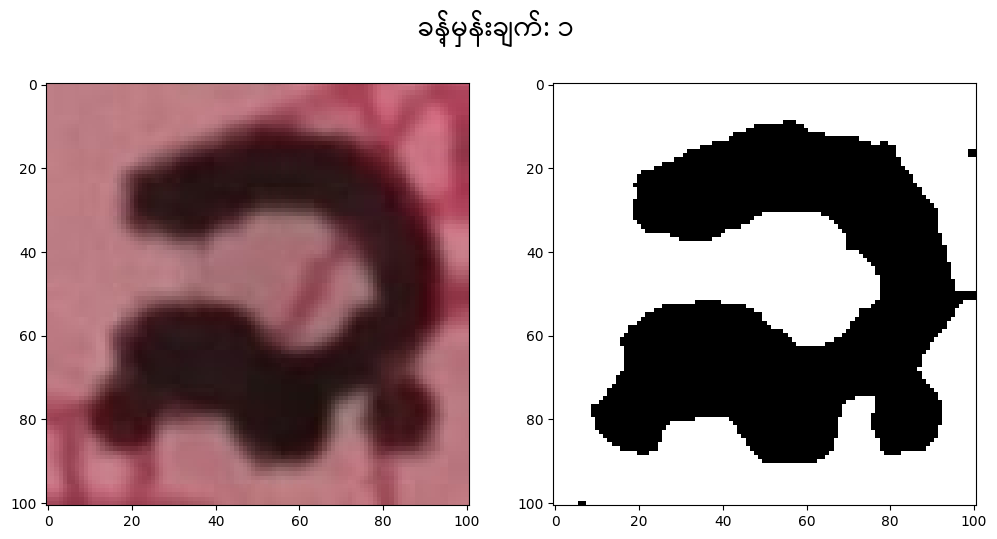

In [14]:
display_nrc_result(model, class_names, "nrc_1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


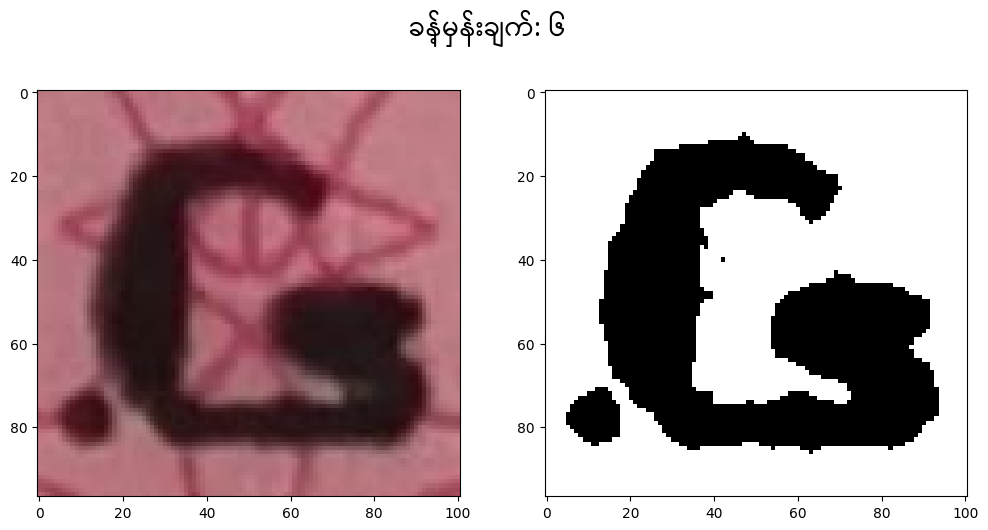

In [15]:
display_nrc_result(model, class_names, "nrc_6.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


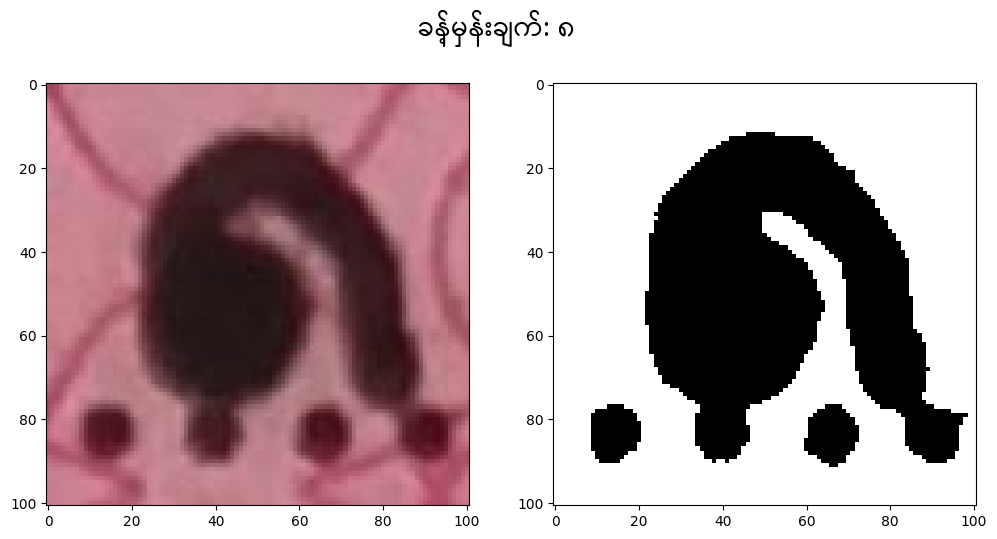

In [16]:
display_nrc_result(model, class_names, "nrc_8.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


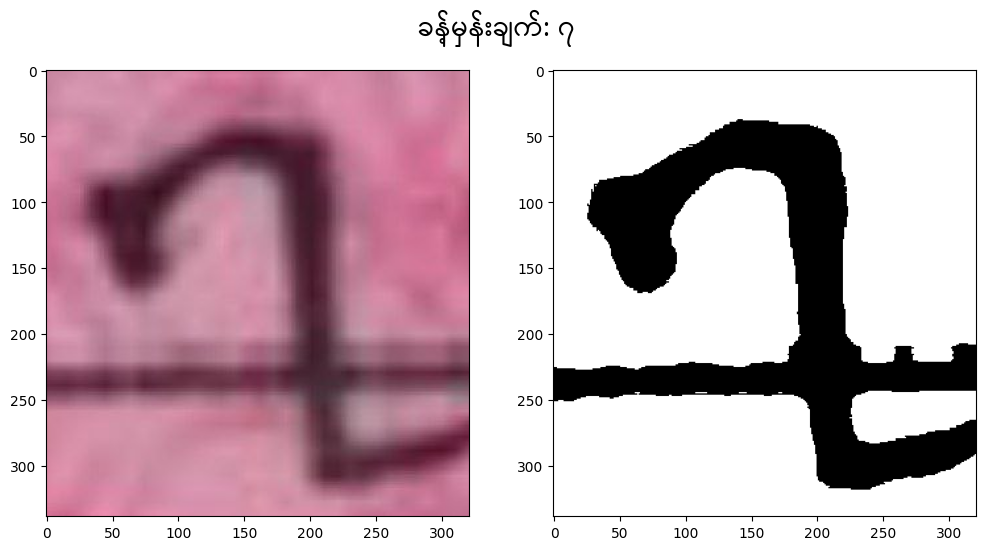

In [17]:
display_nrc_result(model, class_names, "nrc_7.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


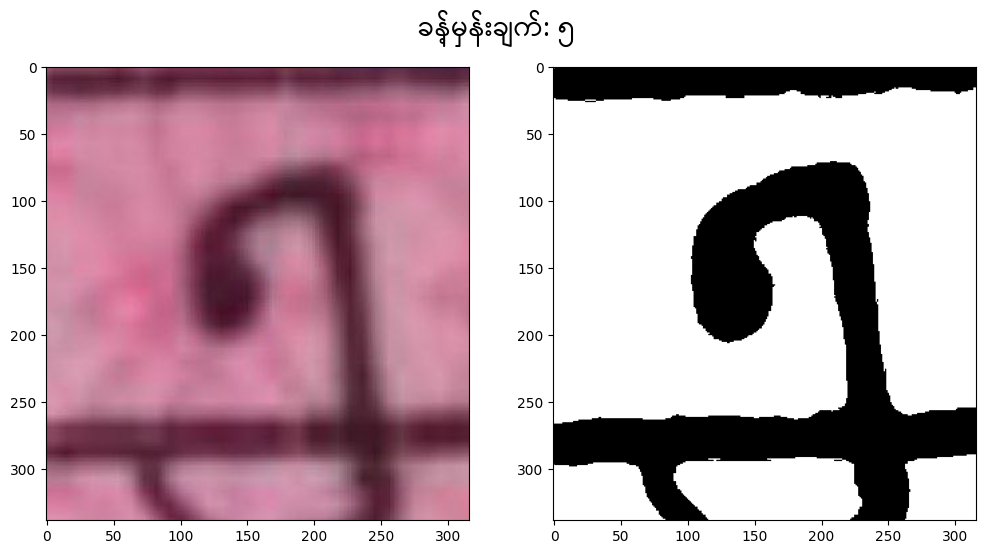

In [18]:
display_nrc_result(model, class_names, "nrc_5.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


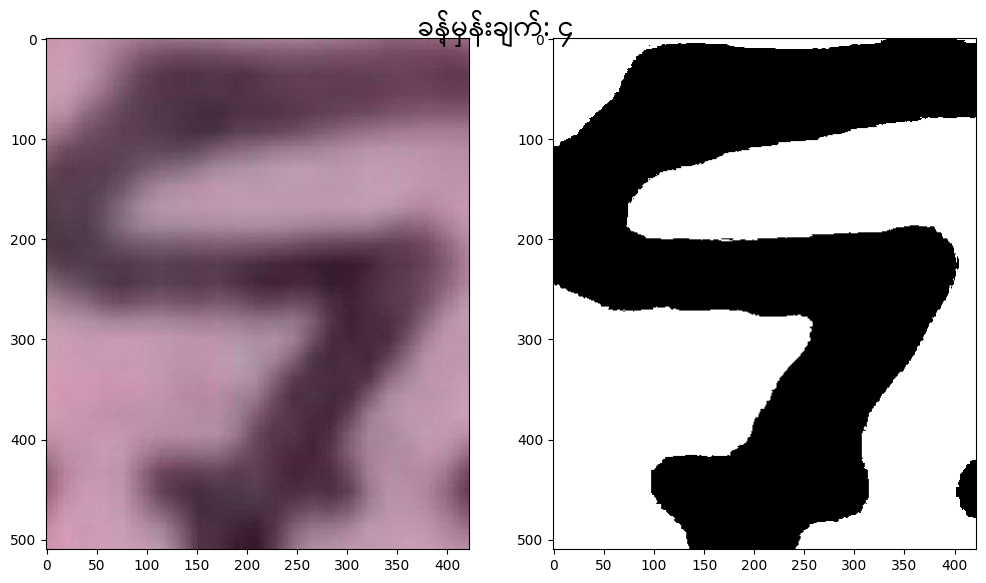

In [19]:
display_nrc_result(model, class_names, "nrc_4.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


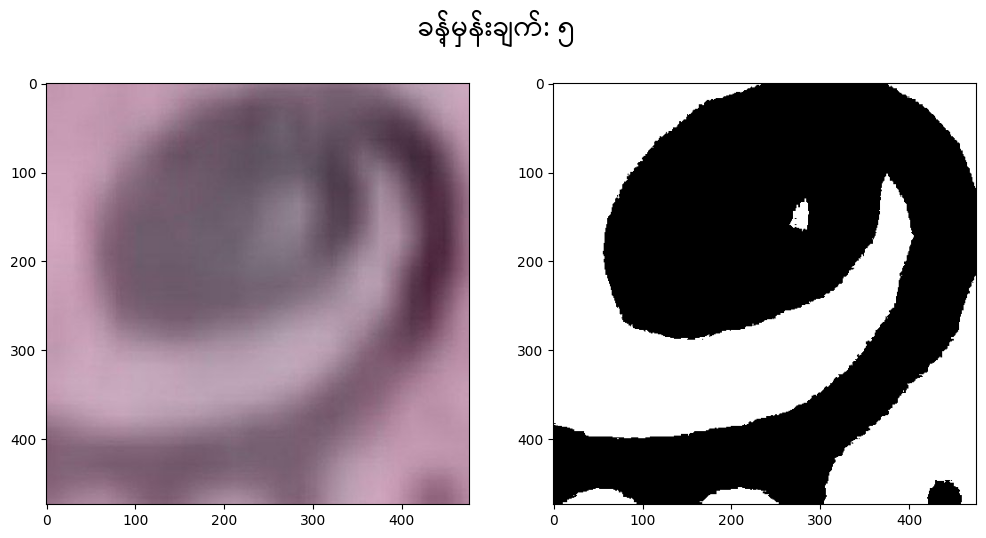

In [20]:
display_nrc_result(model, class_names, "nrc_5_1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


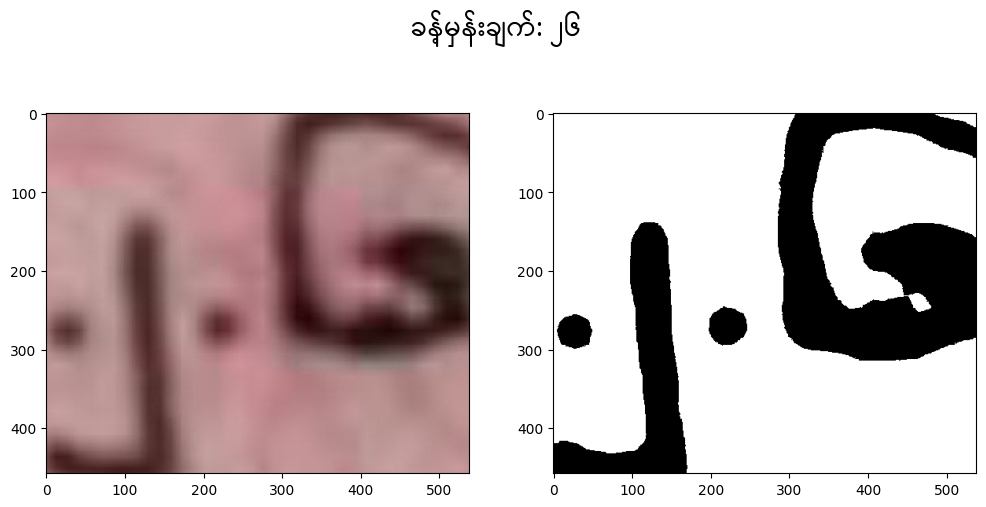

In [21]:
display_nrc_result(model, class_names, "nrc_26_2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


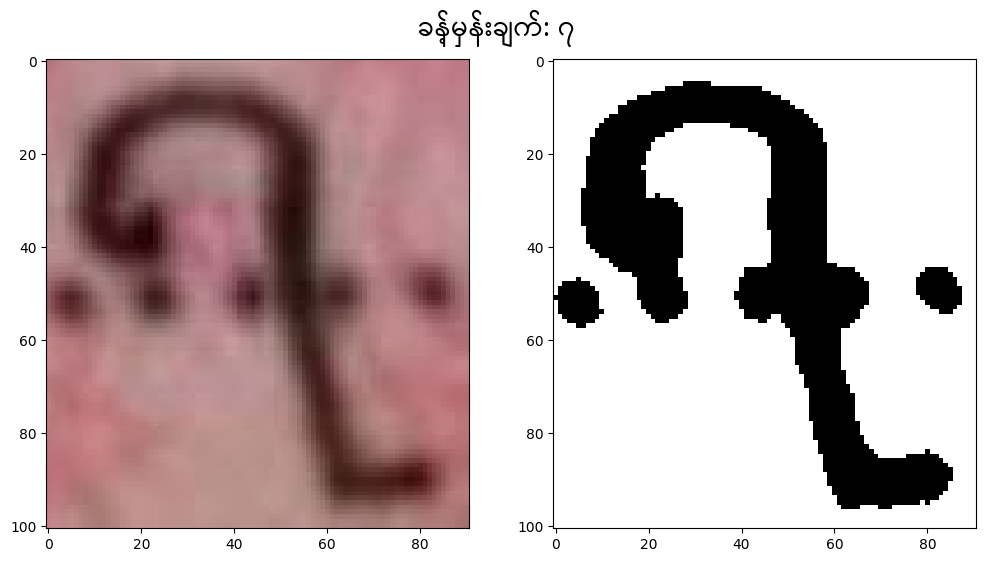

In [22]:
display_nrc_result(model, class_names, "nrc_7_1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


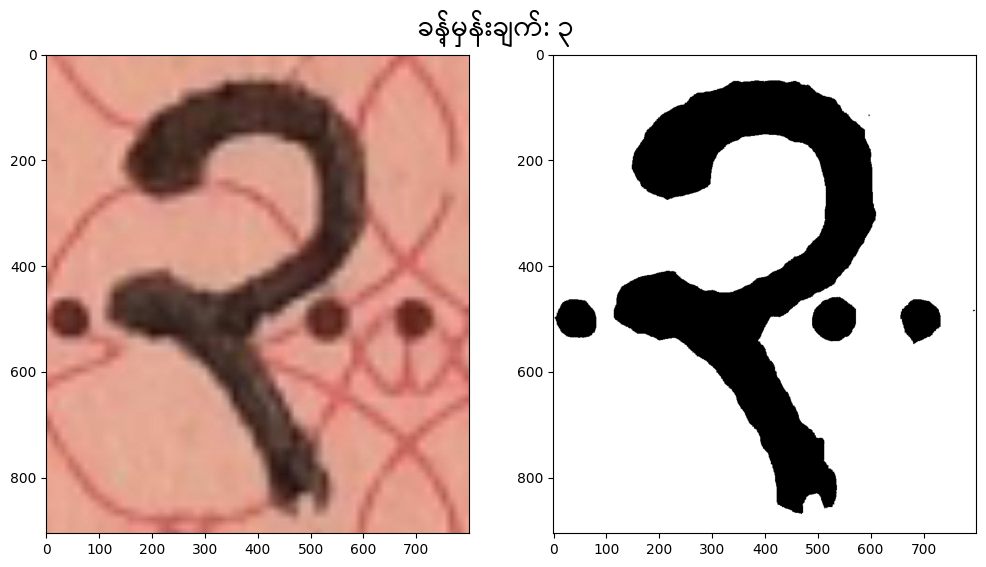

In [8]:
display_nrc_result(model, class_names, "nrc_3.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


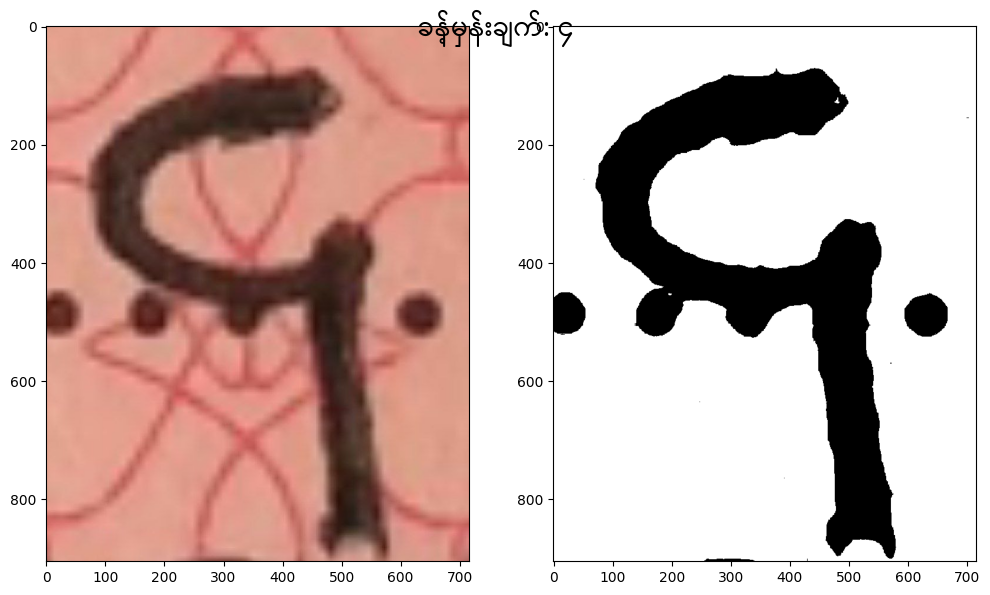

In [9]:
display_nrc_result(model, class_names, "nrc_4_1.jpg")